In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler, scale

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial')
sys.path.append("/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial")
!pwd

/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/data-preprocessing-tutorial


In [4]:
df = pd.read_csv('./datasets/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


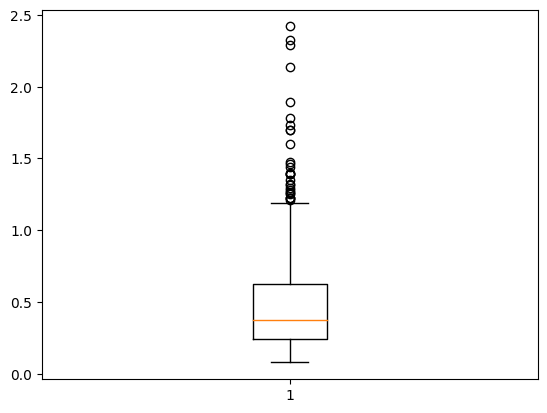

In [6]:
plt.boxplot(df['DiabetesPedigreeFunction'])
plt.show();

In [7]:
df.shape

(768, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
outcome = df['Outcome']
df = df.drop(['Outcome'], axis=1)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


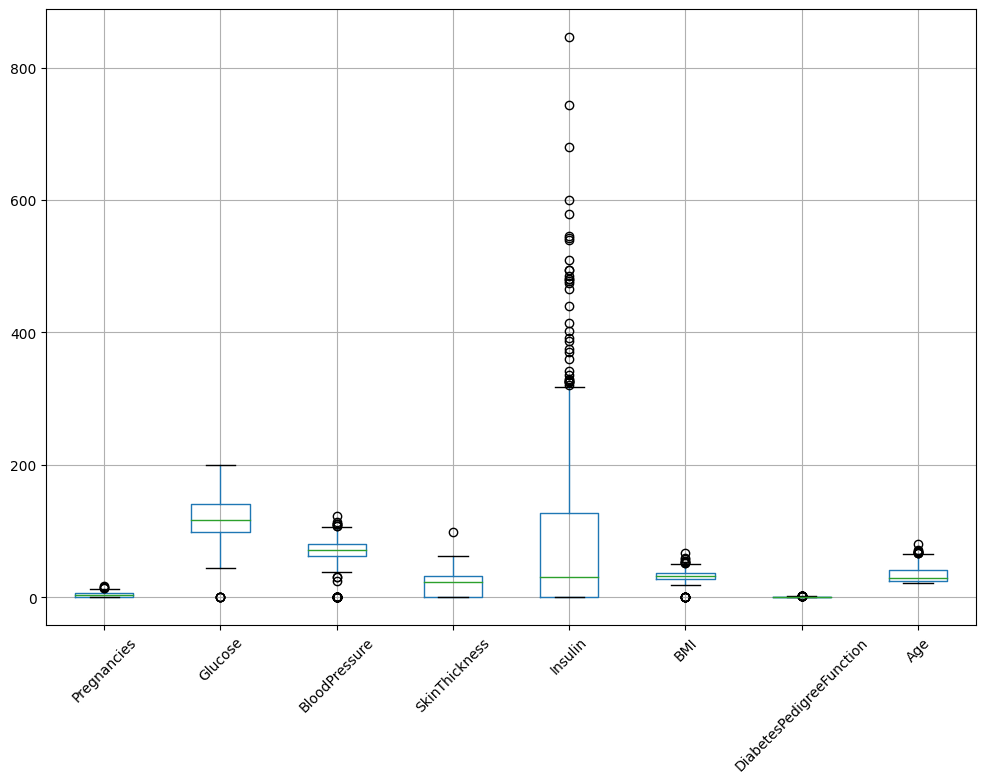

In [12]:
df.boxplot(figsize=(12,8),rot=45)
plt.show();

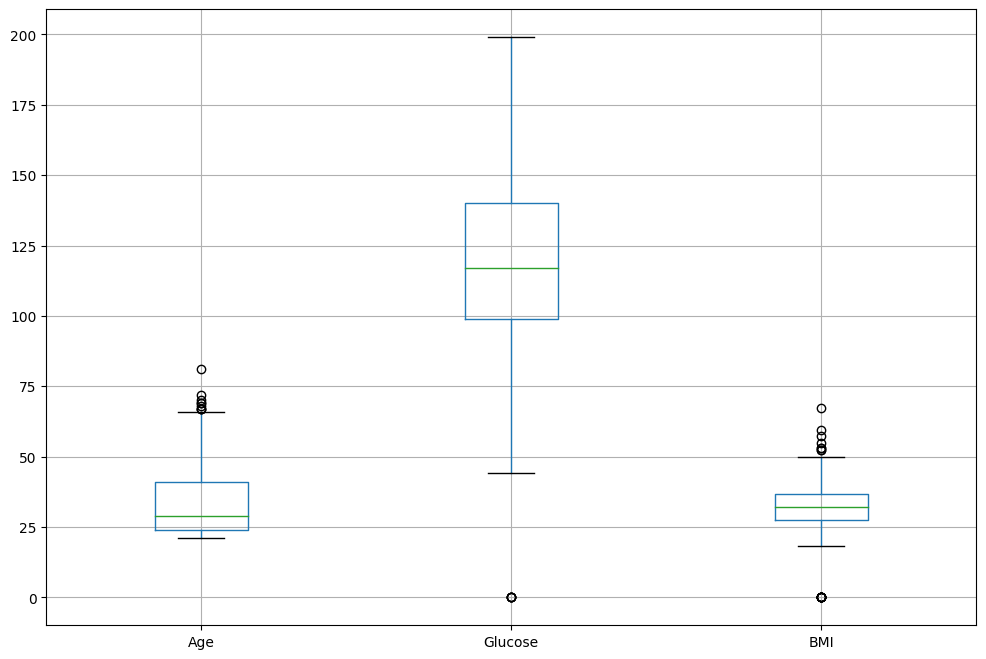

In [13]:
df.boxplot(figsize=(12,8),column=['Age','Glucose', 'BMI'])
plt.show();

In [14]:
manulally_scaled_df = pd.DataFrame()

In [15]:
# manulay
#manulally_scaled_df['Age'] = (df['Age'] - np.mean(df['Age'].values)) / np.std(df['Age'].values)
#manulally_scaled_df['Glucose'] = (df['Glucose'] - np.mean(df['Glucose'].values)) / np.std(df['Glucose'].values)
#manulally_scaled_df['BMI'] = (df['BMI'] - np.mean(df['BMI'].values)) / np.std(df['BMI'].values)

In [16]:
#manulally_scaled_df.describe()

In [17]:
#manulally_scaled_df.boxplot(column=['Age','Glucose', 'BMI'])
#plt.show();

In [18]:
scaled_df = pd.DataFrame()

In [19]:
scaled_df['Age']  = scale(df['Age'])
scaled_df['Glucose']  = scale(df['Glucose'])
scaled_df['BMI']  = scale(df['BMI'])

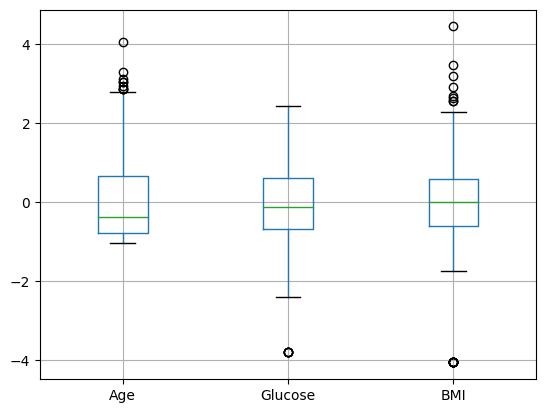

In [20]:
scaled_df.boxplot(column=['Age','Glucose', 'BMI'])
plt.show();

In [21]:
scaled_df.describe()

,Age,Glucose,BMI
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.931325e-16,-9.251859e-18,2.590520e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.041549e+00,-3.783654e+00,-4.060474e+00
25%,-7.862862e-01,-6.852363e-01,-5.955785e-01
50%,-3.608474e-01,-1.218877e-01,9.419788e-04
75%,6.602056e-01,6.057709e-01,5.847705e-01
max,4.063716e+00,2.444478e+00,4.455807e+00


In [22]:
#initialize
std_scaler = StandardScaler(copy=True,
                            with_mean=True,
                            with_std=True)

In [23]:
scaled_array = std_scaler.fit_transform(df)
# now we need to convert this array to DataFrame again!

<Axes: >

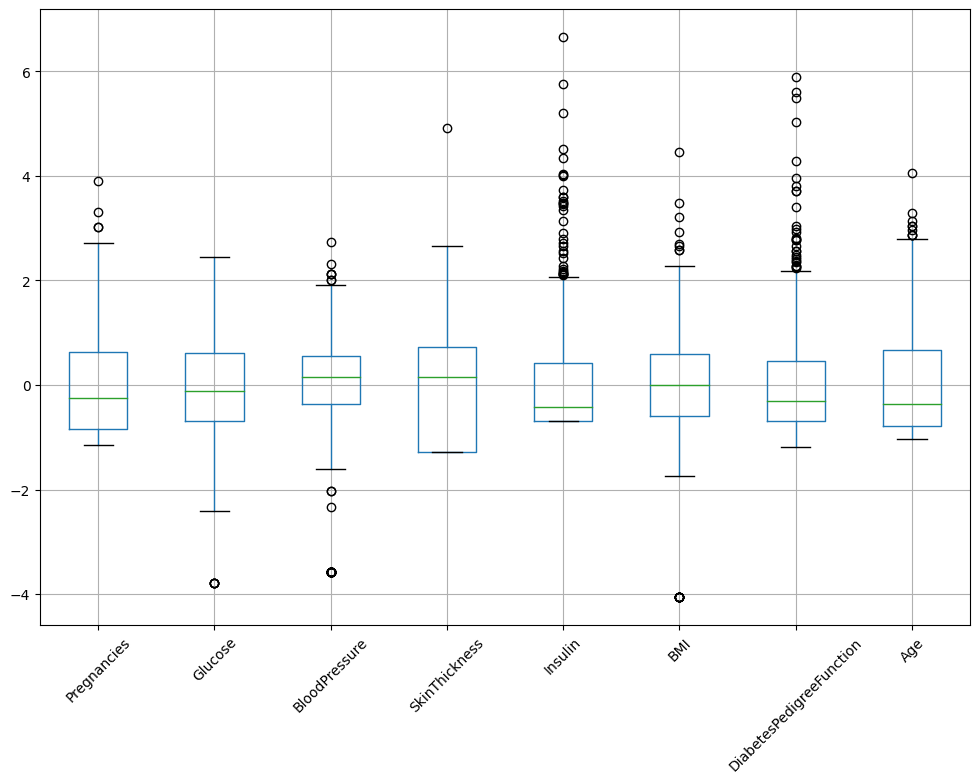

In [24]:
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)
scaled_df.boxplot(figsize=(12,8), rot=45)

In [25]:
std_scaler.var_

array([1.13392724e+01, 1.02091726e+03, 3.74159449e+02, 2.54141900e+02,
       1.32638869e+04, 6.20790465e+01, 1.09635697e-01, 1.38122964e+02])

In [26]:
std_scaler.n_samples_seen_

768

In [27]:
scaled_df['Outcome'] = outcome

In [28]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [29]:
scaled_df.to_csv('scaled_data.csv', index=False)